## Problem Definition

This analysis is on customer segmentation and deposit detection system for a financial organization.

However, what are the problems we'll like to evaluate and proffer solutions to?

- Identify patterns and trends in customers behaviours
- How effective have the campaigns being?
- Analyze loan trends and marketing campaign effectiveness
- Analysis on optimizing operations and mitigating risks/loan defaults
- How to improve customer deposits
- Anticipate future customer behaviour and likelihood of customers deposits

In [2]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset

df = pd.read_csv(r"C:\Users\SALAMAH ALAWIYE\OneDrive - AfyA Care Nigeria\DESKTOP\10alytics\Capstone project\bank.csv")

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [4]:
# Creating a new age category

def age_category(x):
    if x <= 25:
        return "Young adult"
    elif x <= 45:
        return "Adults"
    elif x <= 65:
        return "Elderly"
    else:
        return "Old"
        
df['age_category']= df["age"].apply(age_category)
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Elderly
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adults


In [4]:
#checking for null values and a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#summary of numerical values

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# confirming missing values in the dataset

null = df.isnull().sum()
null

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

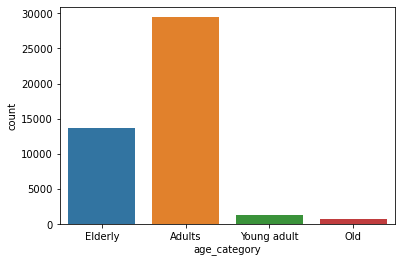

In [7]:
#checking the distribution of age

sns.countplot(x='age_category', data=df);

##### This distribution is right skewed and the highest number of customers are adults

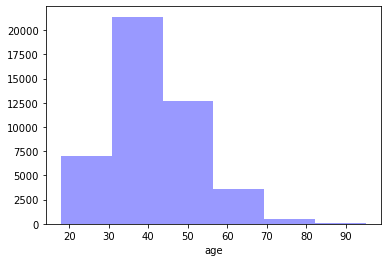

In [11]:
ag=sns.distplot(df['age'], kde= False, bins= 6, color = "b");

##### This further confirms the maximum age range of customers in the dataset (between 30-40)

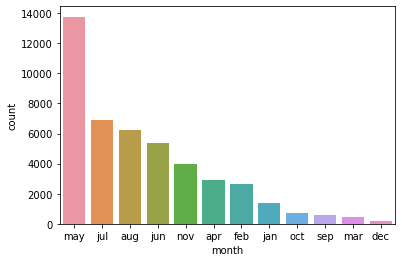

In [10]:
#checking the month with the highest balance

br = sns.countplot(x=df["month"], order = df["month"].value_counts(ascending = False).index)
br;

##### It can be noticed that May had the highest encounter with customers

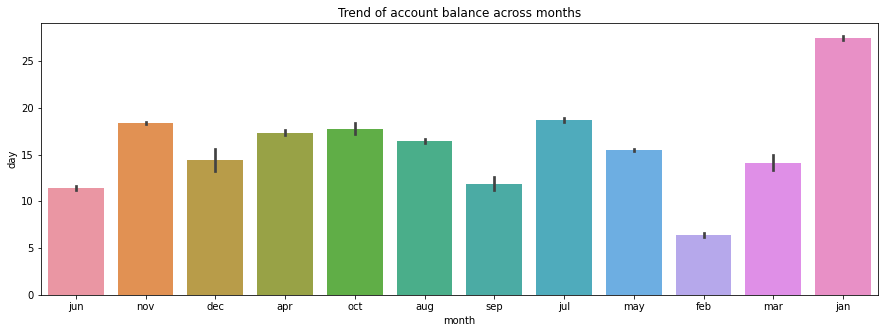

In [25]:
# Analysis with period

plt.figure(figsize=(15,5))

cp = sns.barplot(x=df['month'], y=df['day'])
df.sort_values(by='balance', inplace=True, ascending=True)
plt.title('Trend of account balance across months')
plt.show();

##### However, January had the highest number of deposits as regards to May that had the highest encounter

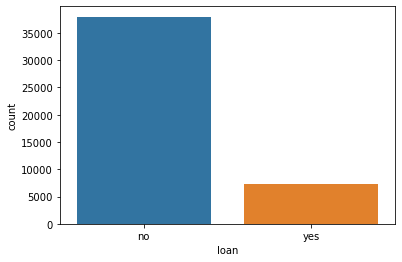

In [11]:
# analyzing the loan behaviour

ln = sns.countplot(x=df["loan"], order = df["loan"].value_counts(ascending = False).index)
ln;

##### This shows that over 70% of the customers have not acquired any loan

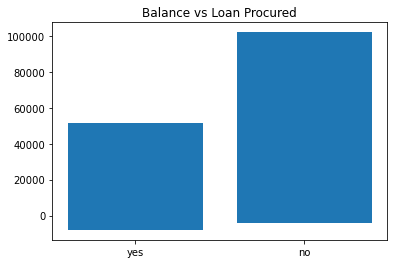

In [24]:
# confirming for relationship between loan and balance

plt.bar(df['loan'], df['balance'])
plt.title ("Balance vs Loan Procured")
df.sort_values('balance', inplace= True, ascending= True)
plt.show()

##### Customers with higher account balance have no loan incurred

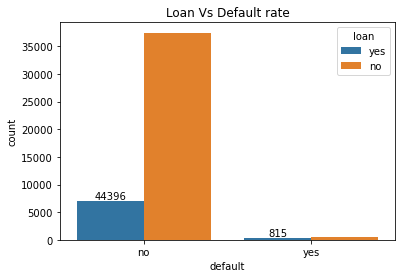

In [19]:
# Relationship between loan collected and default rate

lp= sns.countplot(x='default', data=df, hue= "loan");
plt.title('Loan Vs Default rate')
df.sort_values(by='loan', inplace=True, ascending=False)
values = df['default'].value_counts(ascending=False).values
lp.bar_label(container=lp.containers[0], labels=values);
plt.show();

##### It can be noticed that very few are on loan and even fewer have defaulted

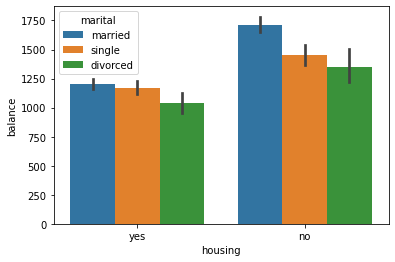

In [25]:
#Relationship between housing loan and account balance

sns.barplot(x='housing', y='balance', data=df, hue = 'marital');

##### From this analysis, we can see that those without housing loan have higher balances in their accounts which makes sense because mortgage would keep taking a portion of their earnings and this is irrespective of marital status.

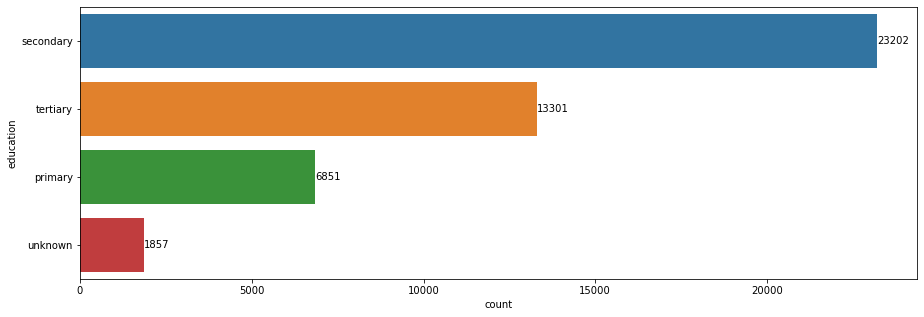

In [14]:
#the distribution of education categories

plt.figure(figsize=(15,5))

ed = sns.countplot(y=df["education"], order=df["education"].value_counts(ascending= False).index)
values = df['education'].value_counts(ascending=False).values
ed.bar_label(container=ed.containers[0], labels=values);

##### It can be seen that secondary certificate is the highest occuring type of certificate(over 45% of all certificate) amongst the customers.

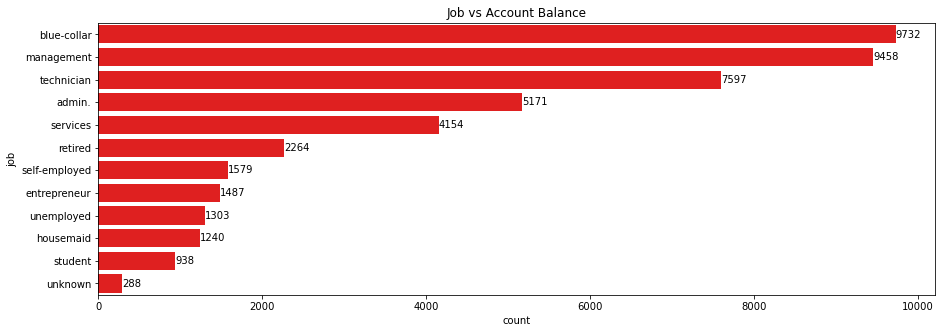

In [5]:
# Relationship between job type and current balance in the bank

plt.figure(figsize=(15,5))

jb = sns.countplot(y=df['job'],order=df['job'].value_counts(ascending=False).index, data=df, color='r')

plt.title('Job vs Account Balance')
df.sort_values(by='balance', inplace=True, ascending=False)
values = df['job'].value_counts(ascending=False).values
jb.bar_label(container=jb.containers[0], labels=values);
plt.show();

##### This shows that those with blue collar and management jobs have higher balance and those with unknown jobs, housemaid or students have lesser account balance. Which in return is dependent on how much you earn basically

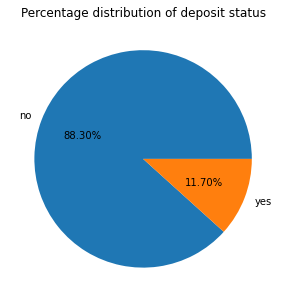

In [16]:
# Analysis on deposit status of customers

fig,ax = plt.subplots(figsize=(5,5))
count= Counter(df['deposit'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage distribution of deposit status")
plt.show();

##### Only 11.7% of customers have deposits in the bank and about 88.3% do not.

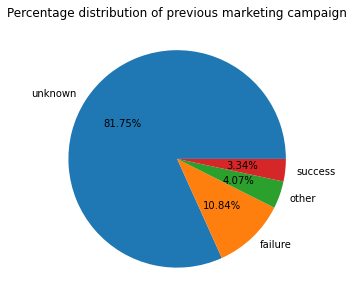

In [15]:
# the ratio of the marketing campaign

fig,ax = plt.subplots(figsize=(5,5))
count= Counter(df['poutcome'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage distribution of previous marketing campaign")
plt.show();

##### It can be noticed that over 81% of the previous campaigns have unknown outcomes. However, the rate of failure is higher than that of success

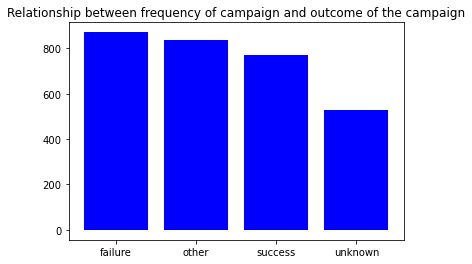

In [14]:
#Relationship between previous campaign and current campaign

dt= plt.bar(df['poutcome'], df['pdays'], color = 'b')
plt.title('Relationship between previous and current campaign')
df.sort_values(by='pdays', inplace=True, ascending=False)
dt;

##### This shows that there were too many days between the previous and present campaigns, which resulted in majority being failure. If the days for follow-up, after a campaign was done, was closer, the result could be different

''

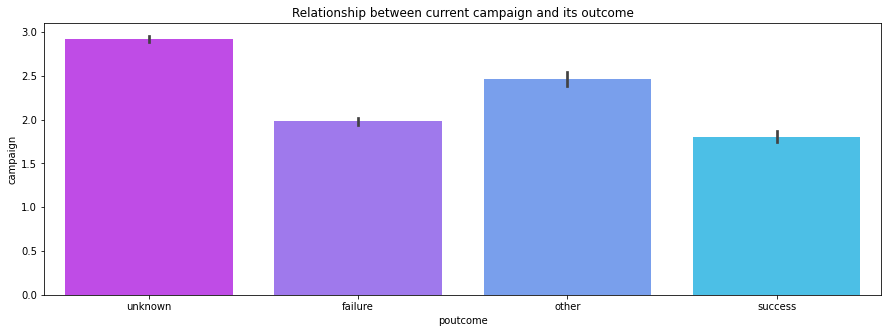

In [22]:
#Relationship between current campaign and current outcome

plt.figure(figsize=(15,5))
pc=sns.barplot(x='poutcome', y='campaign', data=df, palette = 'cool_r')
plt.title('Relationship between current campaign and its outcome')
;

##### Although, both unknown and other category are inconclusive, looking at failure and success, this shows that there were many days between the previous and present campaigns which also resulted in a failed campaign

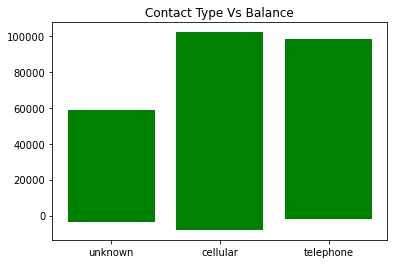

In [11]:
# Analyzing the means of communication

plt.bar(df['contact'], df['balance'], color = 'g')
plt.title('Contact Type Vs Balance')
df.sort_values('balance', inplace = True, ascending = True)


##### It can be noticed that the major means of communication for campaigns was through a cell or a telephone

## Conclusions and Suggestions

- The highest number of customers are adults i.e between the age of 30 and 40
- It can be noticed that May had the highest encounter with customers however, January had the highest number of deposits.
- It was also noticed that over 70% of the customers have not acquired any loan and further analysis showed that even those with loans have very low default rate
- Those without housing loan have higher account balance in the bank which makes sense because mortgage would keep taking a portion of their earnings. Marital status does not influence this conclusion
- Analysing account balance, it was noticed that those with blue collar and management jobs have higher account balance and those with housemaid jobs or students have lesser account balance. The inference is that this is dependent on how much you earn.
- Looking into deposits, only 11.7% of customers have deposits in the bank and about 88.3% do not. This is really low, the suggestion is that interest rate can be increased, zero withdrawal rate can be implemented via online or mobile banking, little or no money transfer rates can be implemented. This would persuade customers to deposit their money much more in the bank.
- When it comes to market campaign, over 81% of the previous campaigns have unknown outcomes. However, the rate of failure is higher than that of success and this was attributed to the fact that the period between the previous campaign and the current campaign was long. Customers constantly need reminders and convincing on the benefit of a product before purchase so implementing a lesser timeframe could be more effective.
- It can be noticed that the major means of communication of campaigns was through a cell or a telephone. Social media platforms should be utilized, these are usually cheaper especially with organic engagement of posts and referrals. Then broadcast and Radio stations could be used as the age range of majority of the customers are adults, they are more inclined towards the TV stations and still listen to radio channels.
